In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def sample_image(image, factor):
    height, width = image.shape[:2] 
    sampled_image = cv2.resize(image, (width // factor, height // factor), interpolation=cv2.INTER_NEAREST)
    return sampled_image 

In [3]:
def quantize_image(image, levels):
    quantized_image = np.floor(image / (256 // levels)) * (256 // levels) 
    quantized_image = quantized_image.astype(np.uint8) 
    return quantized_image

In [5]:
def plot_images(original, sampled, quantized):
    plt.figure(figsize=(12, 4)) 
    plt.subplot(1, 3, 1) 
    plt.imshow(original, cmap='gray')
    plt.title('Original Image') 
    plt.axis('off') 
    
    plt.subplot(1, 3, 2) 
    plt.imshow(sampled, cmap='gray')
    plt.title('Sampled Image') 
    plt.axis('off') 
    
    plt.subplot(1, 3, 3) 
    plt.imshow(quantized, cmap='gray')
    plt.title('Quantized Image') 
    plt.axis('off') 
    plt.show() 

In [27]:
image1_path = 'images/lena_gray_256.png'
image2_path = 'images/cameraman.png'
img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

In [28]:
size = (200,200) 
img1 = cv2.resize(img1, size)
img2 = cv2.resize(img2, size)

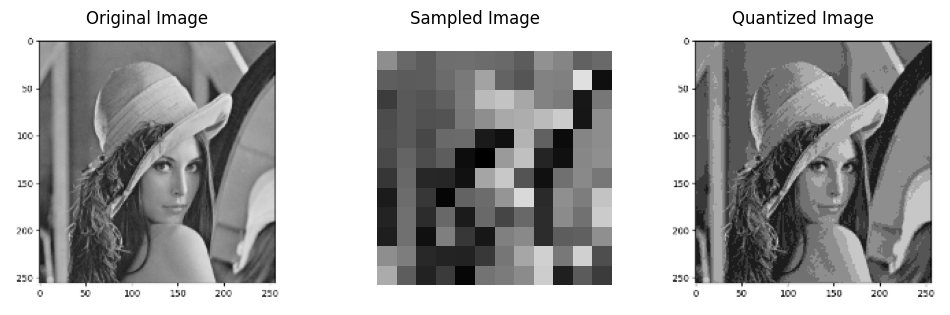

In [29]:
s_factor = 14
q_levels = 9

sampled = sample_image(img1, s_factor)
quantized = quantize_image(img1, q_levels)
plot_images(img1, sampled, quantized)

In [16]:
redIMG = cv2.imread('images/red.png')
greenIMG = cv2.imread('images/green.png')

In [17]:
# Subtract two images
sub_result = cv2.subtract(redIMG, greenIMG)
cv2.imshow('1-Subtraction', sub_result)

In [21]:
# Add one image with a constant value of 175
add_result = cv2.add(redIMG, 175)
cv2.imshow('2-Addition with Constant 175', add_result)

In [23]:
# Set Difference (A AND NOT B)
set_diff = cv2.bitwise_and(redIMG, cv2.bitwise_not(greenIMG))
cv2.imshow('3-Set Difference', set_diff)

In [13]:
# Symmetric Difference (XOR)
sym_diff = cv2.bitwise_xor(redIMG, greenIMG)
cv2.imshow('4-Symmetric Difference', sym_diff)

In [25]:
# Intersection (AND)
intersection = cv2.bitwise_and(redIMG, greenIMG)
cv2.imshow('5-Intersection', intersection)

In [26]:
cv2.waitKey(0)
cv2.destroyAllWindows()